In [1]:
# Data Exploration with Spotify Dataset: Top 40 Songs
# Carry out a numeric summary.
# Calculate the correlation matrix. Create a heat map. Identify correlated variables.
# Create scatterplots for all variable pairs.
# Carry out box plots and show atypical values.
# What are the most relevant associations between variables?


In [2]:
# danceability: Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo,- 
# - rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
# energy: Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
# loudness: Numerical, Overall loudness of a track in decibels (dB).
# speechiness: Numerical, speechiness detects the presence of spoken words in a track.
# acousticness: Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
# instrumentalness: Numerical, predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
# liveness: Numerical, detects the presence of an audience in the recording.
# valence: Numerical, Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
# tempo: Numerical, Overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace.
# duration_ms: Numerical, the duration of the track in milliseconds.
# time_signature: Specifies the number of beats for each bar or measure.


In [3]:
!pip install matplotlib
!pip install ipympl

     |████████████████████████████████| 84 kB 1.9 MB/s 


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#Read dataset
#spotify = pd.read_csv('nombre_del_arc.csv')
#header_row = ['Pres_Art', 'Edad', 'Peso', 'Sup_Corp', 'Dura_Hiper', 'Pulso','Estres']

top40 = pd.read_csv('/content/SpotifyTop2018_40_V2.csv')
top40.head(10)

,Name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dura,0.791,0.848,-3.456,0.0506,0.1830,0.000000,0.4090,0.828,95.000,200480,4
1,Plug_Walk,0.876,0.519,-6.531,0.1430,0.2020,0.000000,0.1080,0.158,94.981,175230,4
2,Silence,0.520,0.761,-3.093,0.0853,0.2560,0.000005,0.1700,0.286,141.971,180823,4
3,Solo_(feat._Demi_Lovato),0.737,0.636,-4.546,0.0437,0.0441,0.000067,0.3500,0.565,105.005,222653,4
4,Sin_Pijama,0.791,0.745,-3.695,0.0464,0.3540,0.000029,0.1040,0.820,94.014,188560,4
5,Call_Out_My_Name,0.489,0.598,-4.929,0.0360,0.2180,0.000000,0.3500,0.172,134.045,228373,3
6,Taki_Taki_(with_Selena_Gomez_Ozuna_&_Cardi_B),0.841,0.798,-4.206,0.2290,0.1530,0.000003,0.0618,0.591,95.948,212500,4
7,River_(feat._Ed_Sheeran),0.748,0.749,-5.916,0.5160,0.1420,0.000000,0.0713,0.659,90.090,221013,4
8,Rewrite_The_Stars,0.684,0.619,-7.005,0.0386,0.0716,0.000000,0.1220,0.284,125.046,217440,4
9,Him_&_I_(with_Halsey),0.589,0.731,-6.343,0.0868,0.0534,0.000000,0.3080,0.191,87.908,268867,4


In [8]:
# (rows,columns)
print(top40.shape)

(40, 12)


In [9]:
# columns
print(top40.columns)

Index(['Name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


In [10]:
# numerical description
top40.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.719200,0.661925,-5.846250,0.121292,0.184621,0.003695,0.177125,0.467942,122.108850,205645.700000,3.950000
std,0.151423,0.137874,1.611051,0.094732,0.209052,0.021231,0.130476,0.228504,31.178064,34324.034325,0.220721
min,0.258000,0.391000,-9.211000,0.023200,0.000282,0.000000,0.021500,0.096700,77.169000,95467.000000,3.000000
25%,0.680500,0.564250,-7.077000,0.049550,0.030800,0.000000,0.095275,0.287500,95.037500,189856.000000,4.000000
50%,0.750000,0.659000,-5.930000,0.105500,0.121500,0.000003,0.112000,0.437500,122.531500,212904.500000,4.000000
75%,0.817500,0.772500,-4.624000,0.144500,0.227500,0.000043,0.294750,0.633250,140.585750,226983.250000,4.000000
max,0.922000,0.909000,-3.093000,0.516000,0.847000,0.134000,0.552000,0.931000,191.702000,268867.000000,4.000000


In [11]:
print(top40.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              40 non-null     object 
 1   danceability      40 non-null     float64
 2   energy            40 non-null     float64
 3   loudness          40 non-null     float64
 4   speechiness       40 non-null     float64
 5   acousticness      40 non-null     float64
 6   instrumentalness  40 non-null     float64
 7   liveness          40 non-null     float64
 8   valence           40 non-null     float64
 9   tempo             40 non-null     float64
 10  duration_ms       40 non-null     int64  
 11  time_signature    40 non-null     int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 3.9+ KB
None


In [12]:
# Correlation matrix
C = top40.corr()
print(C)

                  danceability    energy  ...  duration_ms  time_signature
danceability          1.000000 -0.052973  ...    -0.305303        0.268821
energy               -0.052973  1.000000  ...    -0.035215        0.234110
loudness             -0.043320  0.665634  ...     0.011911       -0.032557
speechiness           0.207397 -0.035225  ...    -0.144740        0.224884
acousticness          0.016291 -0.269420  ...    -0.297226       -0.006534
instrumentalness     -0.102198  0.159487  ...    -0.072171        0.040438
liveness             -0.031392 -0.082066  ...    -0.115850       -0.090593
valence               0.470648  0.465742  ...    -0.273304        0.302942
tempo                -0.301067  0.005003  ...    -0.174676        0.056347
duration_ms          -0.305303 -0.035215  ...     1.000000       -0.272389
time_signature        0.268821  0.234110  ...    -0.272389        1.000000

[11 rows x 11 columns]


In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(C)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.052973 -0.043320     0.207397      0.016291   
energy               -0.052973  1.000000  0.665634    -0.035225     -0.269420   
loudness             -0.043320  0.665634  1.000000    -0.281621     -0.081194   
speechiness           0.207397 -0.035225 -0.281621     1.000000      0.097140   
acousticness          0.016291 -0.269420 -0.081194     0.097140      1.000000   
instrumentalness     -0.102198  0.159487  0.079780    -0.131971     -0.150742   
liveness             -0.031392 -0.082066 -0.050145    -0.225592     -0.155930   
valence               0.470648  0.465742  0.402273     0.059612      0.174967   
tempo                -0.301067  0.005003 -0.034438     0.018453     -0.064332   
duration_ms          -0.305303 -0.035215  0.011911    -0.144740     -0.297226   
time_signature        0.268821  0.234110 -0.032557     0.224884     -0.006534   

                  instrumen

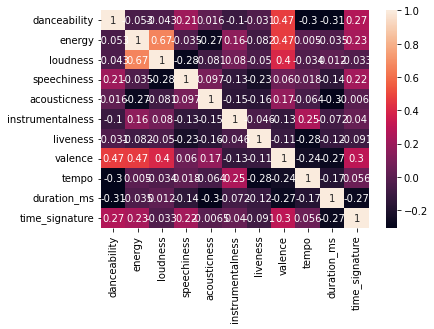

In [14]:
#import seaborn as sns
#import matplotlib.pyplot as plt

sn.heatmap(C, annot = True)
plt.show()

In [33]:
# Rows 35 to 40, with columns name, danceability, energy, loudness
# Op1: .loc [row:col] rows by label
# top40.loc[35:39, 'Name':'loudness']
# Op2: by position in array
top40.iloc[35:40,0:4]

,Name,danceability,energy,loudness
35,Mine,0.710,0.789,-3.874
36,In_My_Feelings,0.835,0.626,-5.833
37,Taste_(feat._Offset),0.884,0.559,-7.442
38,Lucid_Dreams,0.511,0.566,-7.230
39,Promises_(with_Sam_Smith),0.781,0.768,-5.991


In [34]:
import scipy.stats

In [35]:
x = top40['energy']
y = top40['loudness']
x.corr(y)

0.6656337656706722

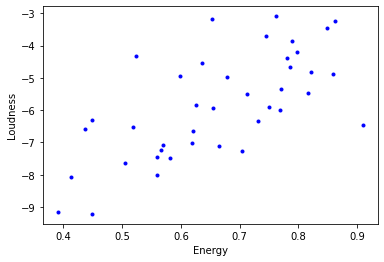

In [38]:
#Scatter Plot
Energy = top40["energy"]
Loudness = top40["loudness"]

plt.plot(Energy,Loudness,'b.')
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [39]:
x = top40['energy']
y = top40['valence']
x.corr(y)

0.4657418559936906

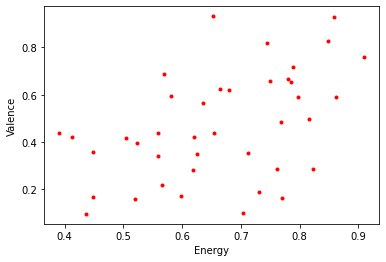

In [45]:
Energy = top40["energy"]
Valence = top40["valence"]

plt.plot(Energy,Valence,'r.')
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.show()

In [41]:
x = top40['danceability']
y = top40['valence']
x.corr(y)

0.47064849660270386

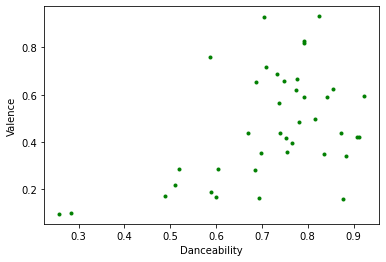

In [44]:
Danceability = top40["danceability"]
Valence = top40["valence"]

plt.plot(Danceability,Valence,'g.')
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()

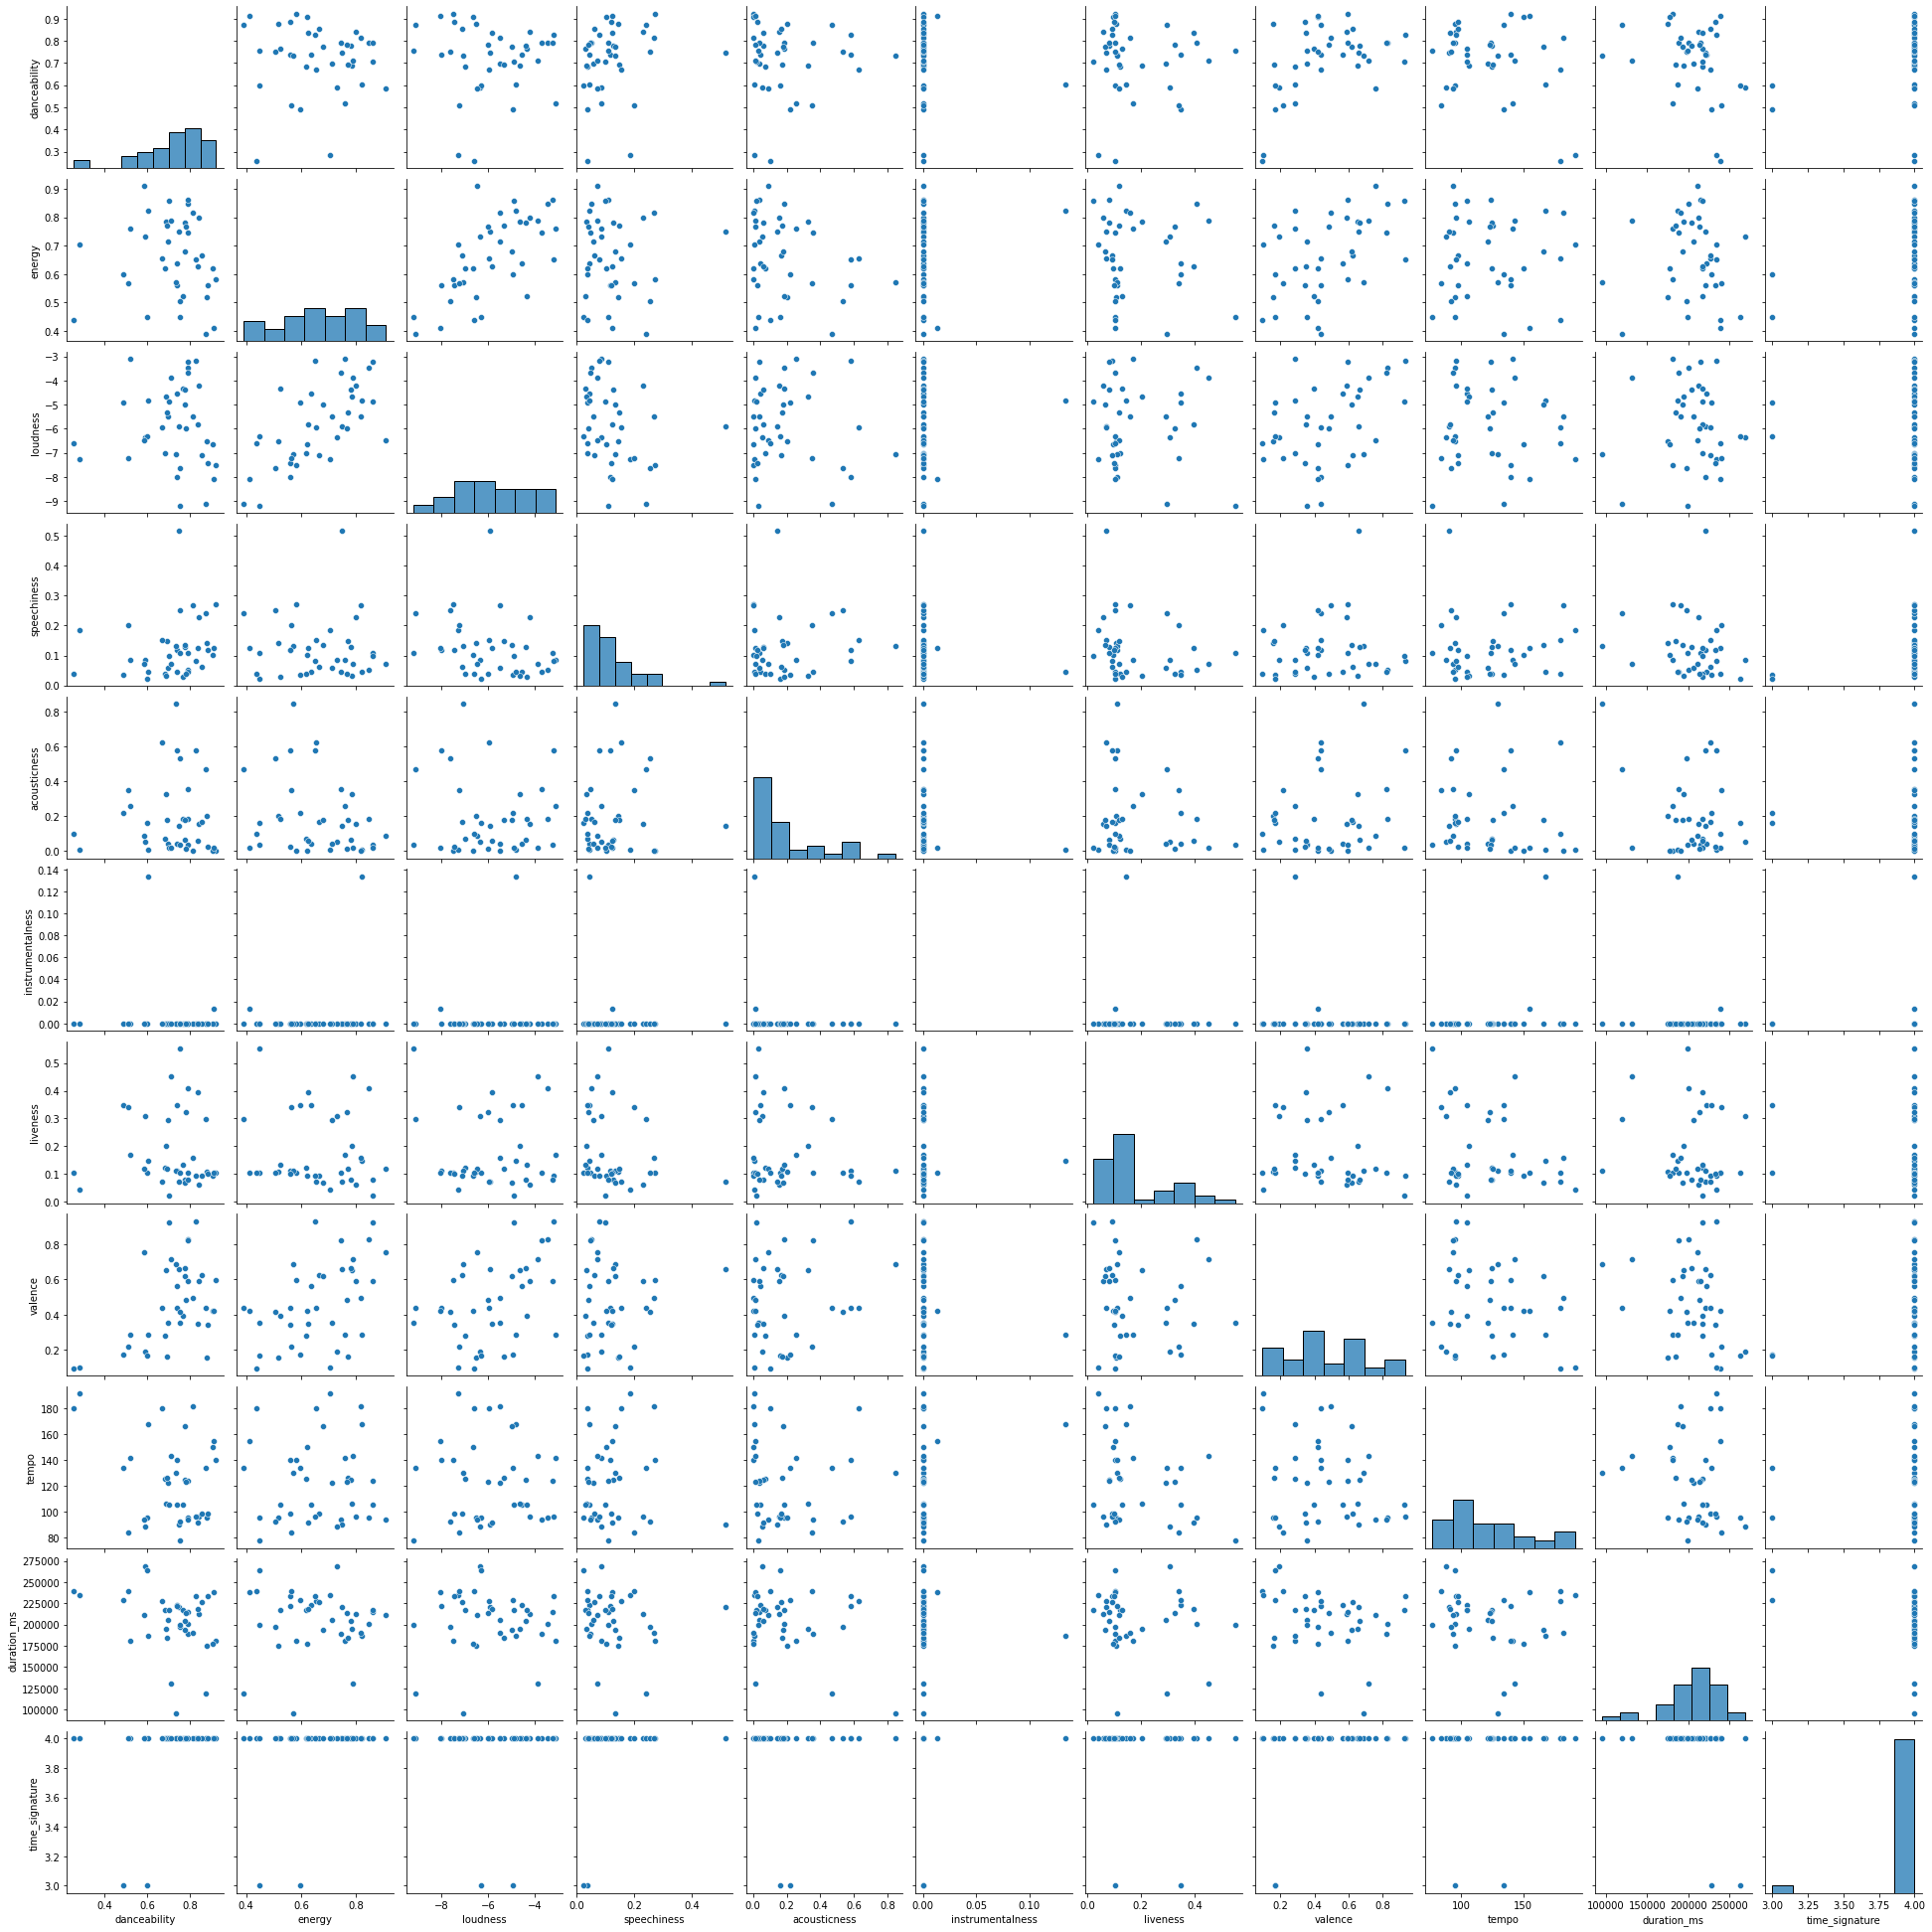

In [46]:
#Multiple plots
# weather = weather.dropna()
sn.pairplot(top40)

In [ ]:
#Boxplots
fig, ax = plt.subplots()
ax.boxplot(gt65_humidity,0,"gD",positions = [1], widths = 0.6)
ax.boxplot(lt65_humidity,0,"bx",positions = [2], widths = 0.6)

ax.set_xticklabels(['air temp 9am > 65', 'air temp 9am < 65'])
ax.set_ylabel('% Humidity')
ax.set_title('air humidity 9am')

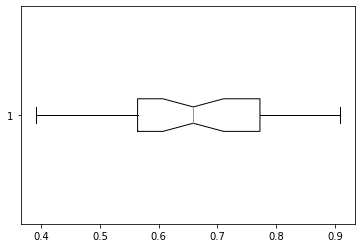

In [51]:
#Boxplot
import matplotlib.pyplot as plt
Energy = top40['energy']

#vanilla
#plt.boxplot(Energy)
#With waist
#plt.boxplot(Energy,1)
#Change outlayer points
#plt.boxplot(Energy,1,"gD")
#Horizontal
plt.boxplot(Energy,1,"bs",0)
plt.show()